In [1]:
from my_logger.custom_logger import logger

In [2]:
import pandas as pd
import os
from hydra import initialize, compose
from hydra.utils import instantiate
from ProcessData.dataset import Dataset
from ProcessData.data_splitter import data_splitter

In [3]:

with initialize(version_base=None, config_path="../conf"):
    cfg = compose(config_name='config.yaml')

In [4]:
df = pd.read_csv("../data/Unprocessed_Data.csv")
data_pipeline = instantiate(cfg.data_pipeline)
df = data_pipeline.apply(df.copy())
dataset = Dataset(data=df, data_splitter=data_splitter)

2024-02-06 11:14:06,227 - my_logger.custom_logger - INFO - Data is splitted
2024-02-06 11:14:06,228 - my_logger.custom_logger - INFO - train: 1068 records
2024-02-06 11:14:06,229 - my_logger.custom_logger - INFO - test: 267 records
2024-02-06 11:14:06,229 - my_logger.custom_logger - INFO - oot: 236 records


In [5]:
model_features = ['rsi', 'mfi']
from sklearn.ensemble import HistGradientBoostingClassifier
from Model.SklearnPipeline import CustomPipeline

clf = HistGradientBoostingClassifier(**cfg.model.model_params)
model = CustomPipeline(indicators = model_features, window =  cfg.model.feature_depth)
model.pipeline.steps.append(("final model", clf))

2024-02-06 11:14:06,402 - my_logger.custom_logger - INFO - Features included in the model are:
rsi1, mfi1


In [6]:
model.fit(dataset.X_train, dataset.y_train)

2024-02-06 11:14:06,409 - my_logger.custom_logger - INFO - Start fitting the pipeline.
2024-02-06 11:14:06,411 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,413 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,431 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


CustomPipeline(indicators=['rsi', 'mfi'], window=1)

In [7]:
model.pipeline

Pipeline(steps=[('FeatureSelector', FeatureSelector(features={'rsi1', 'mfi1'})),
                ('NormCols',
                 AddNormalizedColsTransformer(indicators=['rsi', 'mfi'],
                                              window=1)),
                ('StandardScaler', StandardScaler()),
                ('final model',
                 HistGradientBoostingClassifier(l2_regularization=1,
                                                max_bins=250, max_depth=15,
                                                max_iter=25, max_leaf_nodes=60,
                                                min_samples_leaf=5,
                                                random_state=2))])

In [8]:
from sklearn.utils import estimator_html_repr



pipeline_html_html = model.pipeline

# Specify the file path where you want to save the HTML representation
file_path = "scikit_learn_pipeline.html"

# Open the file in write mode and write the HTML content to it
with open(file_path, "w") as file:
    file.write(estimator_html_repr(pipeline_html_html))

print("Pipeline HTML representation saved to:", file_path)


Pipeline HTML representation saved to: scikit_learn_pipeline.html


In [9]:
model.transfrom_without_predictor(dataset.X_train)

2024-02-06 11:14:06,538 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,541 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,568 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([[0.       , 0.0751646],
       [0.       , 0.0751646],
       [0.       , 0.0751646],
       ...,
       [0.       , 0.0751646],
       [0.       , 0.0751646],
       [0.       , 0.0751646]])

In [10]:
model.predict(dataset.X_test)

2024-02-06 11:14:06,596 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,598 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,605 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [11]:
model.predict_proba(dataset.X_test)

2024-02-06 11:14:06,625 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,626 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,634 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([[0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [

In [12]:
from sklearn.metrics import f1_score

In [13]:
for split_name, (X,y) in dataset.splits.items():
    pred = model.predict(X)
    print(f"{split_name}: {f1_score(y, pred)}")

2024-02-06 11:14:06,675 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,677 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,706 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']
train: 0.0
2024-02-06 11:14:06,742 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,744 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,753 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']
test: 0.0
2024-02-06 11:14:06,769 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,770 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:06,778 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']
oot: 0.0


2024-02-06 11:14:06,942 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:06,947 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']


2024-02-06 11:14:06,974 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


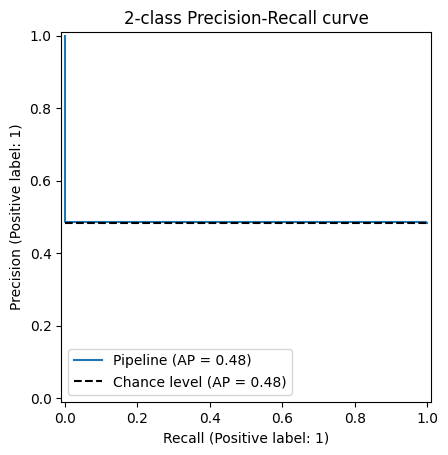

In [14]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    model.pipeline, dataset.X_train, dataset.y_train,  plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

2024-02-06 11:14:07,641 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:07,642 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:07,646 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


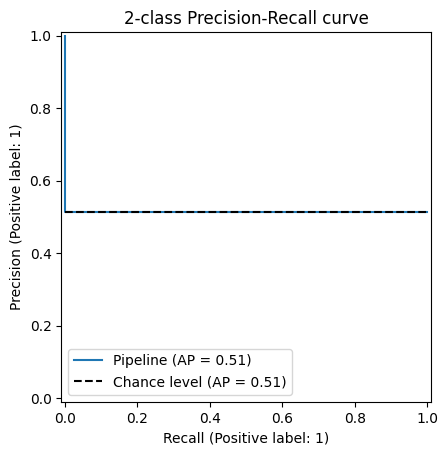

In [15]:
display = PrecisionRecallDisplay.from_estimator(
    model.pipeline, dataset.X_oot, dataset.y_oot,  plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [16]:
dataset.X_oot

,index,Datum,close_price1,open_price1,high_price1,low_price1,rsi1,mfi1,tv1,sma1,...,mfi49,tv49,sma49,williams49,regrs49,cci49,next_close_price1,next_open_price1,diff,sample_weight
1335,1413,05.12.2022 02:25:53,1.056,1.054,1.056,1.054,64.1,64.361509,1.0,1.050286,...,71.422008,1.0,1.036714,-25.000000,0.549771,80.664294,1.058,1.056,2.0,2.1
1336,1414,05.12.2022 04:41:39,1.058,1.056,1.058,1.056,66.1,64.380892,1.0,1.050857,...,64.295555,1.0,1.037143,-57.142857,0.320142,33.018868,1.054,1.056,-4.0,2.1
1337,1415,05.12.2022 08:47:47,1.054,1.056,1.056,1.054,58.8,57.220536,1.0,1.051000,...,64.315219,1.0,1.037714,-28.571429,0.251383,80.188679,1.052,1.054,-2.0,2.1
1338,1416,05.12.2022 11:30:28,1.052,1.054,1.054,1.052,55.5,57.204983,1.0,1.051286,...,64.334862,1.0,1.038286,-14.285714,0.251383,113.125739,1.056,1.054,4.0,2.1
1339,1417,05.12.2022 12:24:31,1.056,1.054,1.056,1.054,60.3,57.216612,1.0,1.051571,...,71.451487,1.0,1.039286,-0.000000,0.198029,140.743551,1.058,1.056,2.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1644,16.02.2023 14:30:03,1.068,1.070,1.070,1.068,42.6,42.936976,1.0,1.073571,...,64.291315,1.0,1.093429,-50.000000,0.471388,37.174721,1.066,1.068,-2.0,2.1
1567,1645,16.02.2023 15:54:18,1.066,1.068,1.068,1.066,40.5,35.803674,1.0,1.072857,...,64.257727,1.0,1.094000,-66.666667,0.156986,1.904762,1.064,1.066,-2.0,2.1
1568,1646,17.02.2023 05:37:20,1.064,1.066,1.066,1.064,38.4,35.822751,1.0,1.072286,...,64.276390,1.0,1.094571,-50.000000,0.033264,46.339564,1.062,1.064,-2.0,2.1
1569,1647,17.02.2023 13:14:21,1.062,1.064,1.064,1.062,36.4,28.685064,1.0,1.071286,...,57.167094,1.0,1.094714,-85.714286,0.035401,-2.683020,1.066,1.064,4.0,2.1


In [17]:
pd.DataFrame(model.transfrom_without_predictor(dataset.X_oot))

2024-02-06 11:14:07,873 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:07,874 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:07,882 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


,0,1
0,0.0,0.075165
1,0.0,0.075165
2,0.0,0.075165
3,0.0,0.075165
4,0.0,0.075165
...,...,...
231,0.0,0.075165
232,0.0,0.075165
233,0.0,0.075165
234,0.0,0.075165


In [18]:
dataset.X_oot[['rsi1', 'rsi2']]

,rsi1,rsi2
1335,64.1,61.9
1336,66.1,64.1
1337,58.8,66.1
1338,55.5,58.8
1339,60.3,55.5
...,...,...
1566,42.6,47.3
1567,40.5,42.6
1568,38.4,40.5
1569,36.4,38.4


In [19]:
from Model.model import AddNormalizedColsTransformer

In [20]:
t = AddNormalizedColsTransformer(['rsi'], 2)

In [21]:
t.transform(dataset.X_oot)[['rsi1', 'rsi2']]

2024-02-06 11:14:07,927 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1', 'rsi2']


,rsi1,rsi2
0,2.124493,0.000000
1,1.939486,0.000000
2,0.000000,6.493797
3,0.000000,3.114796
4,4.417910,0.000000
...,...,...
231,0.000000,4.232981
232,0.000000,1.996479
233,0.000000,1.991111
234,0.000000,1.895833


In [22]:
df = dataset.X_oot 
results = t.transform(dataset.X_oot)[['rsi1', 'rsi2']].reset_index()

2024-02-06 11:14:07,944 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1', 'rsi2']


In [23]:
df = df.reset_index()

In [24]:
results

,index,rsi1,rsi2
0,0,2.124493,0.000000
1,1,1.939486,0.000000
2,2,0.000000,6.493797
3,3,0.000000,3.114796
4,4,4.417910,0.000000
...,...,...,...
231,231,0.000000,4.232981
232,232,0.000000,1.996479
233,233,0.000000,1.991111
234,234,0.000000,1.895833


In [25]:
df[['rsi1', 'rsi2']] = results[['rsi1', 'rsi2']]

In [26]:
df

,level_0,index,Datum,close_price1,open_price1,high_price1,low_price1,rsi1,mfi1,tv1,...,mfi49,tv49,sma49,williams49,regrs49,cci49,next_close_price1,next_open_price1,diff,sample_weight
0,1335,1413,05.12.2022 02:25:53,1.056,1.054,1.056,1.054,2.124493,64.361509,1.0,...,71.422008,1.0,1.036714,-25.000000,0.549771,80.664294,1.058,1.056,2.0,2.1
1,1336,1414,05.12.2022 04:41:39,1.058,1.056,1.058,1.056,1.939486,64.380892,1.0,...,64.295555,1.0,1.037143,-57.142857,0.320142,33.018868,1.054,1.056,-4.0,2.1
2,1337,1415,05.12.2022 08:47:47,1.054,1.056,1.056,1.054,0.000000,57.220536,1.0,...,64.315219,1.0,1.037714,-28.571429,0.251383,80.188679,1.052,1.054,-2.0,2.1
3,1338,1416,05.12.2022 11:30:28,1.052,1.054,1.054,1.052,0.000000,57.204983,1.0,...,64.334862,1.0,1.038286,-14.285714,0.251383,113.125739,1.056,1.054,4.0,2.1
4,1339,1417,05.12.2022 12:24:31,1.056,1.054,1.056,1.054,4.417910,57.216612,1.0,...,71.451487,1.0,1.039286,-0.000000,0.198029,140.743551,1.058,1.056,2.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1566,1644,16.02.2023 14:30:03,1.068,1.070,1.070,1.068,0.000000,42.936976,1.0,...,64.291315,1.0,1.093429,-50.000000,0.471388,37.174721,1.066,1.068,-2.0,2.1
232,1567,1645,16.02.2023 15:54:18,1.066,1.068,1.068,1.066,0.000000,35.803674,1.0,...,64.257727,1.0,1.094000,-66.666667,0.156986,1.904762,1.064,1.066,-2.0,2.1
233,1568,1646,17.02.2023 05:37:20,1.064,1.066,1.066,1.064,0.000000,35.822751,1.0,...,64.276390,1.0,1.094571,-50.000000,0.033264,46.339564,1.062,1.064,-2.0,2.1
234,1569,1647,17.02.2023 13:14:21,1.062,1.064,1.064,1.062,0.000000,28.685064,1.0,...,57.167094,1.0,1.094714,-85.714286,0.035401,-2.683020,1.066,1.064,4.0,2.1


In [27]:
model.predict_proba(dataset.X_oot)

2024-02-06 11:14:08,017 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:08,019 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:08,026 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([[0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [0.5151277, 0.4848723],
       [

In [28]:
from Evaluate.pips import get_pips_margin


In [29]:
get_pips_margin(
    model.predict_proba(dataset.X_oot).T[1],
    dataset.X_oot["next_close_price1"],
    dataset.X_oot["close_price1"],
    threshold=0.55

)

2024-02-06 11:14:08,068 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:08,071 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:08,082 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


0

In [31]:
dataset.X_test[['rsi1', 'mfi1']]

,rsi1,mfi1
304,35.4,21.561210
1058,40.2,42.928575
32,47.1,42.909520
174,42.1,28.614780
290,58.0,71.494342
...,...,...
126,51.9,35.701703
707,56.3,57.218927
1067,59.4,64.409688
1111,51.3,57.211515


In [30]:
model.predict(dataset.X_test[['rsi1', 'mfi1']])

2024-02-06 11:14:08,113 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:14:08,115 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:14:08,122 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [32]:
data = {
"Datum": "1900-01-01",
  "mfi1": "2",
  "rsi1": "1",
}

new_data = pd.DataFrame.from_dict(data, orient="index").T

        # Convert Datum to datetime and other columns to numeric
new_data["Datum"] = pd.to_datetime(new_data["Datum"], dayfirst=True)
columns_to_convert = new_data.columns.difference(["Datum"])

def convert_to_numeric(column):
            return pd.to_numeric(column, errors="coerce")

new_data[columns_to_convert] = new_data[columns_to_convert].apply(
    convert_to_numeric
)

new_data = new_data[['mfi1', 'rsi1']]

In [33]:
new_data

,mfi1,rsi1
0,2,1


In [34]:
model.predict(new_data)

2024-02-06 11:29:46,343 - my_logger.custom_logger - INFO - Selecting features from Dataset
2024-02-06 11:29:46,346 - my_logger.custom_logger - INFO - Normalizing cols: ['rsi1']
2024-02-06 11:29:46,349 - my_logger.custom_logger - INFO - Normalizing cols: ['mfi1']


array([0])